In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
from numba import jit
from scipy.integrate import odeint
from time import time

In [2]:
# Just-in-time compiling these two functions
# seems to gain about a factor 2 in speed.
# (Note that the first time the function is called,
# it is slower, since compilation takes place.)
# (Note also that you should never define and use
# a just-in-time compiled function in the same cell
# in a notebook, as it will be compiled every time)

@jit
def lorenz(x, sigma, rho, beta):
    # The Lorenz system (see Ch. 9 in Strogatz)
    xdot = sigma*(x[1] - x[0])
    ydot = x[0]*(rho - x[2]) - x[1]
    zdot = x[0]*x[1] - beta*x[2]
    return np.array([xdot, ydot, zdot])

@jit
def f(x, t):
    # Wrapper function for the lorenz equations
    sigma = 10.0
    rho   = 28.0
    beta  = 8/3
    return lorenz(x, sigma, rho, beta)

In [3]:
x0 = [  5.62590715,  21.47606796,  26.79759756]
T  = np.linspace(0, 20, 10000)

tol = 1e-12
tic = time()
X   = odeint(f, x0, T, atol = tol, rtol = tol)
toc = time()

print('Calculating trajectory took %s seconds' % (toc - tic))

Calculating trajectory took 0.33465099334716797 seconds


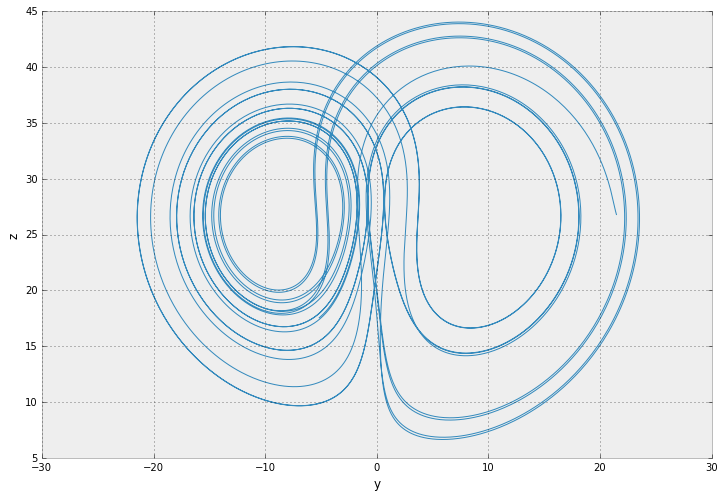

In [4]:
# Reproducing approximately figure 9.4.1 from Strogatz
fig = plt.figure(figsize = (12,8))
plt.plot(X[:,1], X[:,2], lw = 1)
plt.xlabel('y')
plt.ylabel('z')

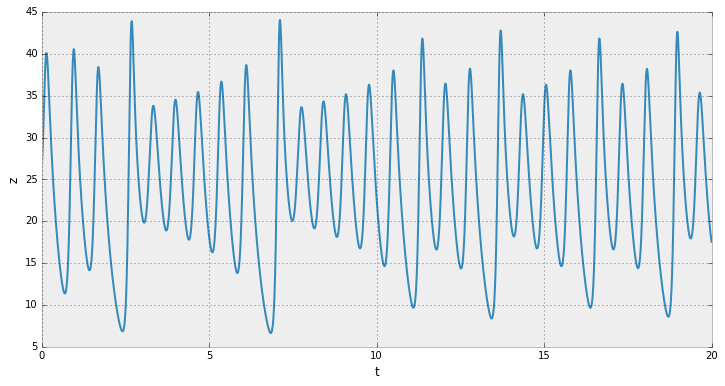

In [5]:
# Reproducing approximately figure 9.4.2 from Strogatz
fig = plt.figure(figsize = (12,6))
plt.plot(T, X[:,2])
plt.xlabel('t')
plt.ylabel('z')

In [6]:
# A function to find a list of local maxima
@jit
def maxima(x):
    mask = np.zeros(x.size, dtype = np.bool)
    for i in range(1, x.size - 1):
        if (x[i] > x[i-1]) and (x[i] > x[i+1]):
            mask[i] = True
    return x[mask]

In [7]:
# Get a longer series of data
x0 = [  5.62590715,  21.47606796,  26.79759756]
T  = np.linspace(0, 1000, 1000000)
tol = 1e-12
X   = odeint(f, x0, T, atol = tol, rtol = tol)
# Get list of local maxima
m = maxima(X[:,2])

(30, 48)

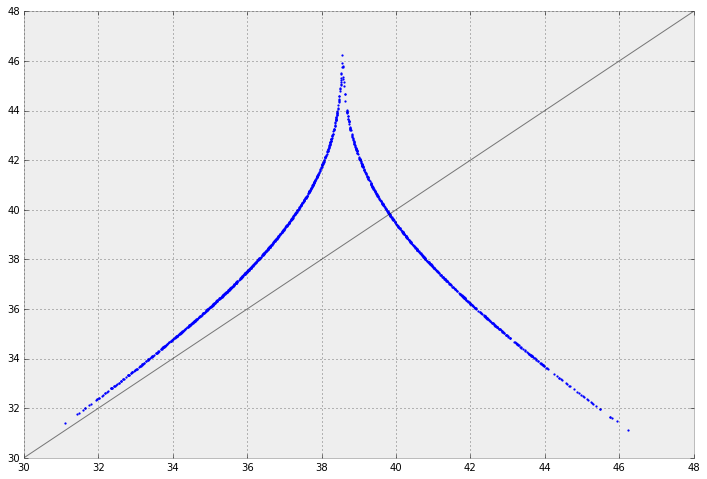

In [8]:
# Reproducing approximately figure 9.4.3 from Strogatz
# Scatter plot z_n+1 as a function of z_n
# (Remove first and last points)
N = m.size
fig = plt.figure(figsize = (12,8))
plt.scatter(m[1:N-2], m[2:N-1], marker = '.', lw = 0)
plt.plot([30,48], [30,48], lw = 1, c = 'k', alpha = 0.5)
plt.xlim(30,48)
plt.ylim(30,48)